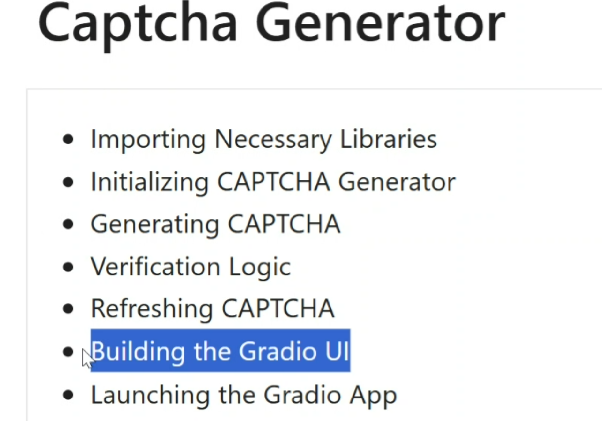

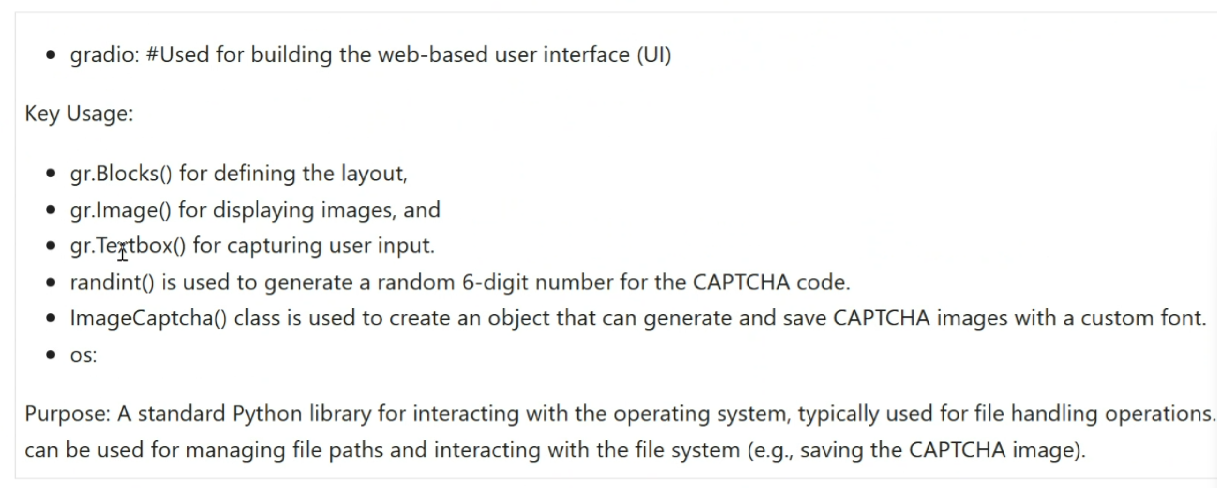


In [1]:
import gradio as gr
from random import randint
from captcha.image import ImageCaptcha
import os

# Ensure font exists or use a default font
font_path = "D:/ChelseaMarket-Regular.ttf"
if not os.path.exists(font_path):
    font_path = None  # Use the default font

# Initialize CAPTCHA generator
image = ImageCaptcha(fonts=[font_path] if font_path else None)

# Global variables
current_captcha = ""
captcha_file_path = "captcha.png"  # Temporary file for CAPTCHA image

# Generate a new CAPTCHA and save it as an image file
def generate_captcha():
    global current_captcha
    current_captcha = str(randint(100000, 999999))
    image.write(current_captcha, captcha_file_path)
    return captcha_file_path  # Return the image file path

# Verify CAPTCHA input
def verify_captcha(user_input):
    if user_input.strip() == current_captcha:
        return "✅ Success! CAPTCHA Verified."
    else:
        return "❌ Error: CAPTCHA Not Verified."

# Refresh CAPTCHA function
def refresh_captcha():
    return generate_captcha()

# Create Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("### 🛡️ CAPTCHA Verification System")
    
    # CAPTCHA Image Display
    captcha_display = gr.Image(value=generate_captcha(), label="CAPTCHA", interactive=False, type="filepath")

    # User Input
    captcha_entry = gr.Textbox(label="Enter CAPTCHA", placeholder="Type the code here...")

    # Buttons
    with gr.Row():
        verify_button = gr.Button("✅ Verify")
        refresh_button = gr.Button("🔄 Refresh CAPTCHA")

    # Output Result
    verification_result = gr.Textbox(label="Result", interactive=False)

    # Button Actions
    verify_button.click(verify_captcha, inputs=captcha_entry, outputs=verification_result)
    refresh_button.click(lambda: generate_captcha(), outputs=captcha_display)

# Launch Gradio App
demo.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
